In [6]:
import csv as csv 
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
data = pd.read_csv('titanic_data.csv', index_col=0, parse_dates=True)

# "parse_dates" seems to be the only data wrangling I've done. This
# data is fairly clean except for the missing ages of some passengers.

# The Titanic at a Glance

This analysis will answer the question: "What factors made a passenger aboard the Titanic more likely to survive?" Specifically, we'll be looking at the influence of age, sex, and passenger class on survivorship.

Let's begin by looking at some basic stats of the Titanic's passengers.

Using the describe method, we see:

- 891 passengers in the sample, 38.4% of which survived.
- An average age of 29.7 years.
- 52% had siblings or spouses aboard.
- 38% had parents or children aboard.

In [8]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5,1,'Titanic Passengers by Age')

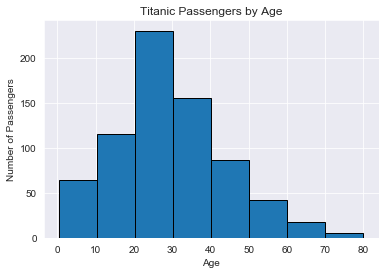

In [9]:
# Let's see a histogram of the age ranges...

data['Age'].hist(bins=8, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Titanic Passengers by Age')

In [10]:
# The number of missing values for ages

data['Age'].isnull().sum()

177

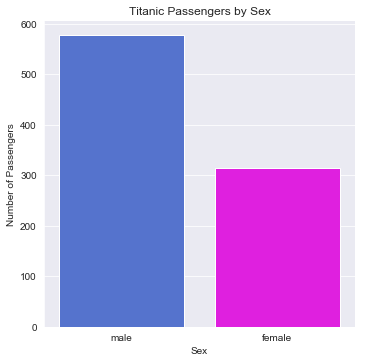

In [15]:
# Breakdown of men and women aboard the Titanic

sns.catplot('Sex', data=data,
               kind='count',
               palette=['royalblue','magenta'])

plt.ylabel('Number of Passengers')
plt.title('Titanic Passengers by Sex')
plt.xticks(rotation=0);

# Again it's worth noting that this is only a
# sample of the 2200+ passengers.

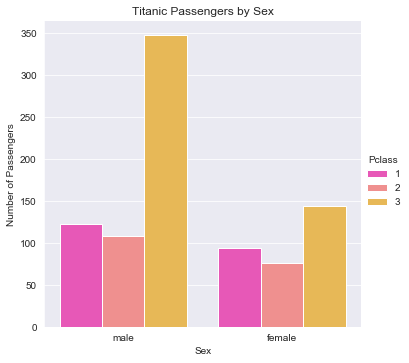

In [17]:
# We can also use 'hue' to break it down by passenger class.

sns.catplot('Sex', data=data, kind='count',
               hue='Pclass', palette='spring')

plt.ylabel('Number of Passengers')
plt.title('Titanic Passengers by Sex')
plt.xticks(rotation=0);

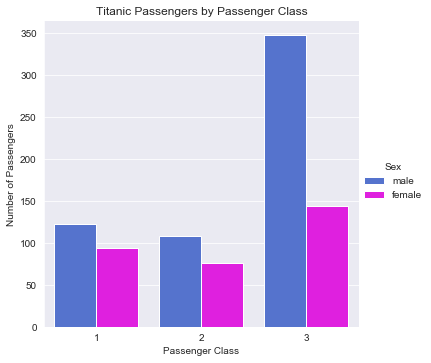

In [19]:
# The reverse; passenger class broken down by sex

sns.catplot('Pclass',data=data, kind='count',
               palette=['royalblue','magenta'],
               hue='Sex')

plt.ylabel('Number of Passengers')
plt.xlabel('Passenger Class')
plt.title('Titanic Passengers by Passenger Class')
plt.xticks(rotation=0);

Text(0,0.5,'')

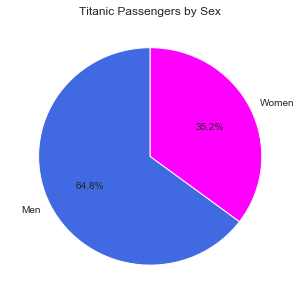

In [20]:
# A pie chart so we can visualize the proportions

passengers_by_sex = data['Sex'].value_counts()

passengers_by_sex.plot.pie(autopct='%1.1f%%', startangle=90, colors=['royalblue', 'magenta'], \
                              labels=['Men', 'Women',], figsize=(5,5))

plt.title('Titanic Passengers by Sex');
pylab.ylabel('') # Removes the y-axis "sex" label

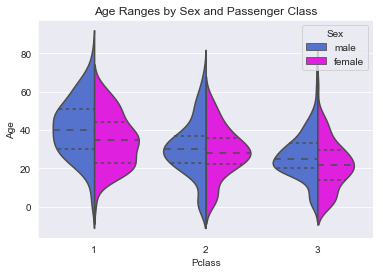

In [21]:
# A violin plot illustrating age ranges
# across passenger classes and sexes.

sns.violinplot(x="Pclass", y="Age",
               hue="Sex", data=data,
               palette=['royalblue','magenta'],
               split=True, inner='quartile')

plt.title('Age Ranges by Sex and Passenger Class');

# Men, Women, and Children

In [22]:
# np.where is a simple and intuitive way to add categorical information
# to a dataframe.

# Step 1:
# Where age is 16 or greater, put in their sex, otherwise put child
data['Category'] = np.where(data['Age'] >= 16, data['Sex'], 'child')

# Step 2:
# Where age is null, put in their sex, otherwise don't change anything
data['Category'] = np.where(data['Age'].isnull() == True, data['Sex'], data['Category'])

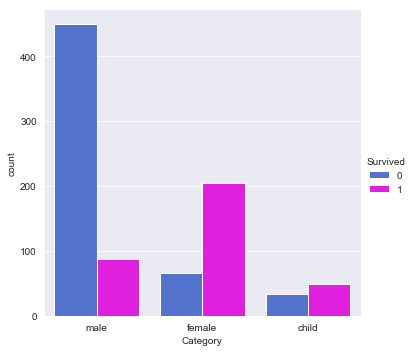

In [23]:
# We can then use a factor plot to visualize survival rates.

sns.catplot('Category', data=data, hue='Survived',
               kind='count',
               palette=['royalblue','magenta']);

### Calcuating the number of passengers and survivors using NumPy

In [24]:
# An alternative way to count passengers and survivors.
# np.size looks at the length of this column, while
# np.sum adds the 1's to count the number of survivors

passengers_number = np.size(data['Survived'].astype(np.float))
survivors_number = np.sum(data['Survived'].astype(np.float))
survivors_pct = survivors_number / passengers_number

print('Passengers:', passengers_number)
print('Survivors:', survivors_number)
print('Proportion of survivors:', survivors_pct)

Passengers: 891
Survivors: 342.0
Proportion of survivors: 0.3838383838383838


# Digging into the statistics

Now let's look at the demographic data in more detail. I've calculated the survival rates in relation to the following variables:

- Sex
- Age (children, teens, adults)
- Passenger class

I also created some "custom" demographics by combining multiple variables:


#### Wealthy Women
After noticing that women and 1st-class passengers had higher survival rates, I tried combining the two into a single demographic. The results are somewhat surprising!

#### Working-class Men
This is the opposite of my "wealthy women" demographic. Since males and 3rd-class passengers were less likely to survive, I combined these variables as well.

#### Large Families and Lone Wolves
I'm using the word "large" somewhat liberally; I'm defining it as a family with 4 or more members on board. Conversely, my lone wolves are people with no family on board.

#### Newlyweds
This includes people aged 18-29, with no kids or parents, and 1 sibling/spouse onboard. Yes -- this demographic may include young, unmarried adults who traveled with just a sibling -- but my assumption is that this was relatively uncommon.

In [25]:
# I'll be using this function to calculate survival rates
# for my various demographics.

def survivor_stats(demographic):
    '''
    Calculates the number of passengers who fit the supplied
    demographic, as well as the number of those surviving and
    the percentage. Returns a dictionary.
    '''
    survivor_data = {}
    survivor_data['Aboard'] = data[demographic]['Survived'].count()
    survivor_data['Survived'] = data[demographic]['Survived'].sum()
    
    survivor_data['Survived_pct'] = survivor_data['Survived']/survivor_data['Aboard']
    
    return survivor_data

### Sex vs. Survival Rates

In [26]:
# Survival stats for women

women_only = data['Sex'] == 'female'
women_dict = survivor_stats(women_only)
women_dict

{'Aboard': 314, 'Survived': 233, 'Survived_pct': 0.7420382165605095}

In [27]:
# Survival stats for men

men_only = data['Sex'] == 'male'
men_dict = survivor_stats(men_only)
men_dict

{'Aboard': 577, 'Survived': 109, 'Survived_pct': 0.18890814558058924}

In [28]:
# Now let's put this in a dataframe

sexes_df = pd.DataFrame([men_dict, women_dict], [['men', 'women']])
sexes_df

,Aboard,Survived,Survived_pct
men,577,109,0.188908
women,314,233,0.742038


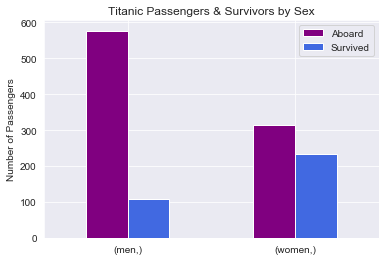

In [29]:
# Let's graph it!

# We don't want this in our graph,
# but it'll be useful separately:
sexes_survived_pct = sexes_df.pop('Survived_pct') 

sexes_df.plot.bar(color=['purple', 'royalblue'])
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.title('Titanic Passengers & Survivors by Sex');

# This graph looks a bit different from the men/women/children factorplot
# because it's graphing aboard vs. survived -- NOT survived vs. perished.

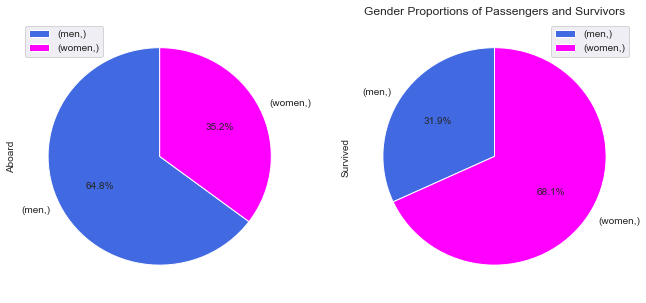

In [30]:
# A pie chart showing the proportions of men and women
# who were a) on board, and b) among the survivors.

# NOTE: This doesn't mean "31.9% of men survived;"
# it means of the survivors, 31.9% were men.

sexes_df.plot.pie(subplots = True, autopct='%1.1f%%',
                  startangle=90, colors=['royalblue','magenta'],
                  figsize=(11,5))
plt.title('Gender Proportions of Passengers and Survivors');

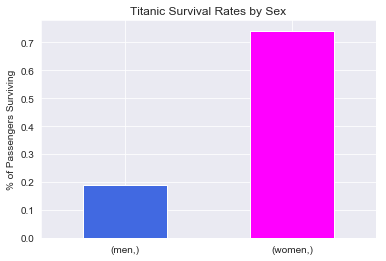

In [34]:
# Finally, we can look at survival rates.

sexes_survived_pct.plot.bar(color=['royalblue','magenta'])
plt.ylabel('% of Passengers Surviving')
plt.xticks(rotation=0)
plt.title('Titanic Survival Rates by Sex');

### Preliminary Findings
Women survived in much higher numbers than men. When we look at the overall ridership, it's approximately 65% male and 35% female. Those proportions reverse when we look at the survivors: 68% female and 32% male.

About 74% of women survived, while about 19% of men survived.

## Passenger class
Next, let's examine how passenger class affected survival rates...

In [35]:
class_1 = data['Pclass'] == 1
class_2 = data['Pclass'] == 2
class_3 = data['Pclass'] == 3

In [36]:
# Survival stats for 1st class passengers

class_1_dict = survivor_stats(class_1)
class_1_dict

{'Aboard': 216, 'Survived': 136, 'Survived_pct': 0.6296296296296297}

In [37]:
# Survival stats for 2nd class passengers

class_2_dict = survivor_stats(class_2)
class_2_dict

{'Aboard': 184, 'Survived': 87, 'Survived_pct': 0.47282608695652173}

In [38]:
# Survival stats for 3rd class passengers

class_3_dict = survivor_stats(class_3)
class_3_dict

{'Aboard': 491, 'Survived': 119, 'Survived_pct': 0.24236252545824846}

In [39]:
# Again, let's put this in a dataframe to make some quick comparisons
# and then graph it.

class_df = pd.DataFrame([class_1_dict, class_2_dict, class_3_dict],
                        [['1st class', '2nd class', '3rd class']])
class_df

,Aboard,Survived,Survived_pct
1st class,216,136,0.629630
2nd class,184,87,0.472826
3rd class,491,119,0.242363


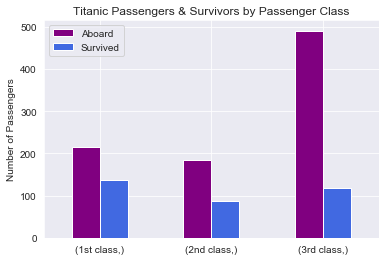

In [40]:
class_survived_pct = class_df.pop('Survived_pct') # Graph this separately

class_df.plot.bar(color=['purple', 'royalblue'])
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.title('Titanic Passengers & Survivors by Passenger Class');

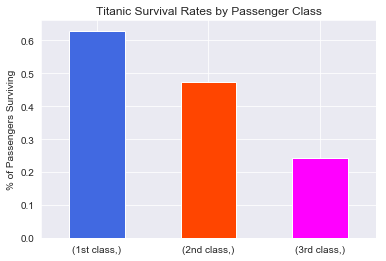

In [41]:
# Finally, we can look at survival rates.

class_survived_pct.plot.bar(color=['royalblue', 'orangered', 'magenta'])
plt.ylabel('% of Passengers Surviving')
plt.xticks(rotation=0)
plt.title('Titanic Survival Rates by Passenger Class');

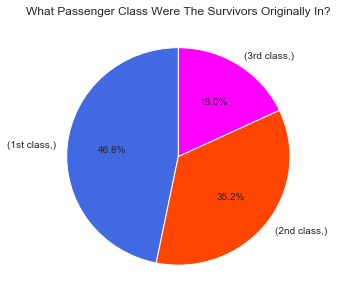

In [42]:
# Pie charts

class_survived_pct.plot.pie(autopct='%1.1f%%', startangle=90, colors=['royalblue', 'orangered', 'magenta'], figsize=(5,5))
plt.title('What Passenger Class Were The Survivors Originally In?')
pylab.ylabel('');

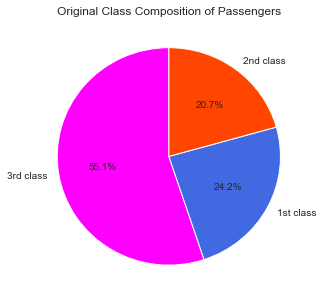

In [43]:
# Let's look at the original class composition, while we're at it.

passengers_by_pclass = data['Pclass'].value_counts()

passengers_by_pclass.plot.pie(autopct='%1.1f%%', startangle=90, colors=['magenta', 'royalblue', 'orangered'], \
                              labels=['3rd class', '1st class', '2nd class'], figsize=(5,5))

plt.title('Original Class Composition of Passengers')
pylab.ylabel('');

### Preliminary Findings
First class passengers were much more likely to survive (62.9%), compared to 2nd class (47.3%) and 3rd class passengers (24.2%).

# Age vs. Survival Rate

I decided it would be interesting (as well as good practice for me) to manually categorize passengers into 3 age groups:

- Children (12 and under)
- Teens (13 to 19)
- Adults (20 and up)

We don't know the ages of many passengers, but we can still glean some interesting insights from this analysis.

In [44]:
# Set up our categories

children = data['Age'] < 13
teens = ((data['Age'] >= 13) & (data['Age'] < 20))
adults = data['Age'] >= 20

unknown_age = data['Age'].isnull()

In [45]:
# Survival stats for children

children_dict = survivor_stats(children)
children_dict

{'Aboard': 69, 'Survived': 40, 'Survived_pct': 0.5797101449275363}

In [46]:
# Survival stats for teens

teens_dict = survivor_stats(teens)
teens_dict

{'Aboard': 95, 'Survived': 39, 'Survived_pct': 0.4105263157894737}

In [47]:
# Survival stats for adults

adults_dict = survivor_stats(adults)
adults_dict

{'Aboard': 550, 'Survived': 211, 'Survived_pct': 0.3836363636363636}

In [48]:
# Survival stats for unknown ages

unknown_ages_dict = survivor_stats(unknown_age)
unknown_ages_dict

{'Aboard': 177, 'Survived': 52, 'Survived_pct': 0.2937853107344633}

In [49]:
# Put this in a dataframe...

ages_df = pd.DataFrame([children_dict, teens_dict, adults_dict, unknown_ages_dict],
                       [['children', 'teens', 'adults', 'unknown']])
ages_df

,Aboard,Survived,Survived_pct
children,69,40,0.579710
teens,95,39,0.410526
adults,550,211,0.383636
unknown,177,52,0.293785


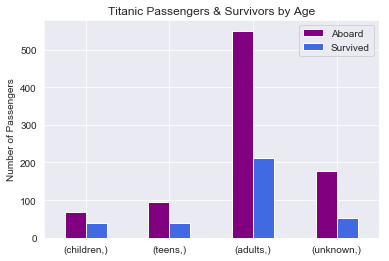

In [50]:
ages_survived_pct = ages_df.pop('Survived_pct') # Graph this separately

ages_df.plot.bar(color=['purple', 'royalblue'])
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.title('Titanic Passengers & Survivors by Age');

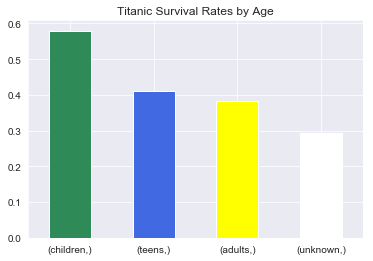

In [51]:
ages_survived_pct.plot.bar(color=['seagreen', 'royalblue', 'yellow', 'white'])
plt.xticks(rotation=0)
plt.title('Titanic Survival Rates by Age');

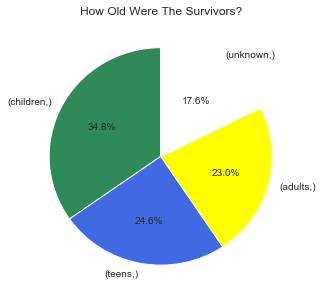

In [52]:
ages_survived_pct.plot.pie(autopct='%1.1f%%',
                           startangle=90, colors=['seagreen','royalblue','yellow','white'],
                           figsize=(5,5))
plt.title('How Old Were The Survivors?')
pylab.ylabel('');

### Preliminary Findings
The effect of age on survival rate wasn't as pronounced as I expected. Teens and adults perished at roughly the same rate, while children were more likely to survive.

# Custom Demographics

This section includes survival rates for the following demographics:

#### Wealthy Women
Female first-class passengers

#### Working-class Men
Male third-class passengers

#### Lone Wolves
People with no family on board

#### Large families
Families with 4 or more members on board

#### Newlyweds
Passengers aged 18-29 with 1 "sibling or spouse" on board, but no parents or children.

In [53]:
wealthy_women = ((data['Sex'] == 'female') & (data['Pclass'] == 1))
wealthy_women_dict = survivor_stats(wealthy_women)
wealthy_women_dict

{'Aboard': 94, 'Survived': 91, 'Survived_pct': 0.9680851063829787}

In [54]:
working_class_men = ((data['Pclass'] == 3 ) & (data['Sex'] == 'male'))
working_class_men_dict = survivor_stats(working_class_men)
working_class_men_dict

{'Aboard': 347, 'Survived': 47, 'Survived_pct': 0.13544668587896252}

In [55]:
lone_wolves = ((data['Parch'] == 0 ) & (data['SibSp'] == 0))
lone_wolves_dict = survivor_stats(lone_wolves)
lone_wolves_dict

{'Aboard': 537, 'Survived': 163, 'Survived_pct': 0.30353817504655495}

In [56]:
large_families = ((data['Parch'] > 1 ) & (data['SibSp'] > 0))
large_families_dict = survivor_stats(large_families)
large_families_dict

{'Aboard': 62, 'Survived': 22, 'Survived_pct': 0.3548387096774194}

In [57]:
newlyweds = ((data['Parch'] == 0 ) & (data['SibSp'] == 1) & (data['Age'] >= 18) & (data['Age'] < 30))
newlyweds_dict = survivor_stats(newlyweds)
newlyweds_dict

{'Aboard': 42, 'Survived': 18, 'Survived_pct': 0.42857142857142855}

In [61]:
#Put this in a dataframe...

custom_demographics_df = pd.DataFrame([wealthy_women_dict, working_class_men_dict, lone_wolves_dict, \
                                       large_families_dict, newlyweds_dict], \
                                      ['Wealthy women', 'Working-class men', \
                                       'Lone Wolves', 'Large Families', \
                                       'Newlyweds'])
custom_demographics_df

,Aboard,Survived,Survived_pct
Wealthy women,94,91,0.968085
Working-class men,347,47,0.135447
Lone Wolves,537,163,0.303538
Large Families,62,22,0.354839
Newlyweds,42,18,0.428571


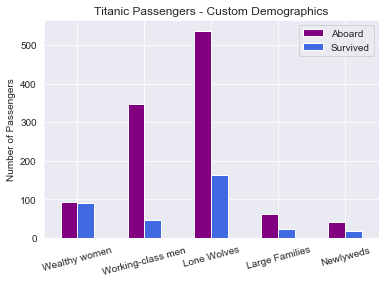

In [62]:
# Graph this separately, as usual
custom_demographics_survived_pct = custom_demographics_df.pop('Survived_pct')

custom_demographics_df.plot.bar(color=['purple', 'royalblue'])

plt.ylabel('Number of Passengers')
plt.title('Titanic Passengers - Custom Demographics')
plt.xticks(rotation=15);

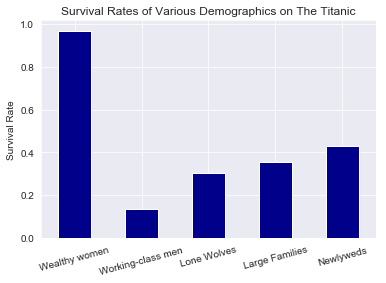

In [63]:
# Make a bar graph

custom_demographics_survived_pct.plot.bar(color='darkblue')

plt.ylabel('Survival Rate')
plt.title('Survival Rates of Various Demographics on The Titanic')
plt.xticks(rotation=15);

### Preliminary Findings
Two of these demographics were particularly interesting. Nearly 97% of women in first class survived, while only 13.5% of men in third class survived.

The survival rates for my remaining demographics were roughly the same as the overall 38.4% survival rate:
- Lone wolves (30.4%)
- Large families (35.5%)
- Newlyweds (42.9%)

# Conclusions

These results demonstrate a fairly consistent theme. The people who had the highest likelihood of surviving were a) female, and b) wealthy. Children were a little more likely to survive as well, with 58% getting rescued, in comparison to 38.4% in my sample overall.

These results also suggest that the "women and children first" protocol was firmly in place. It seems highly likely that many men were assisting with the evacuation efforts and were unable to later save themselves.

Finally, the shortcomings of this analysis should be noted. We only examined a sample of 891 passengers, while the actual voyage had over 2200. We also didn't perform a rigorous statistical analysis, instead using the "eye test" to determine which variables affected survivorship most.

---
### Resources used

Pandas documentation
http://pandas.pydata.org/pandas-docs/stable/index.html

Seaborn documentation
https://stanford.edu/~mwaskom/software/seaborn/api.html

Learning Python for Data Analysis and Visualization
https://www.udemy.com/learning-python-for-data-analysis-and-visualization/
(I learned a lot from this course, including how to use factor plots and np.where)
